# Avocado Project

Project Description: 


This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 
The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 
Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 
The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:
1. Date - The date of the observation
2. AveragePrice - the average price of a single avocado
3. type - conventional or organic
4. year - the year
5. Region - the city or region of the observation
6. Total Volume - Total number of avocados sold
7. 4046 - Total number of avocados with PLU 4046 sold
8. 4225 - Total number of avocados with PLU 4225 sold
9. 4770 - Total number of avocados with PLU 4770 sold


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv('C:/Users/jdjra/OneDrive/Desktop/Internship/evaluation projects/1st phase/avocado.csv')

In [3]:
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


In [4]:
df['Unnamed: 0'].value_counts()

0     432
7     432
1     432
11    432
9     432
8     432
10    432
6     432
5     432
4     432
3     432
2     432
41    324
34    324
35    324
36    324
37    324
38    324
39    324
40    324
47    324
42    324
43    324
44    324
45    324
46    324
32    324
48    324
49    324
50    324
33    324
26    324
31    324
30    324
12    324
13    324
14    324
15    324
16    324
17    324
18    324
19    324
20    324
21    324
22    324
23    324
24    324
25    324
27    324
28    324
29    324
51    322
52    107
Name: Unnamed: 0, dtype: int64

It look likes the column 'Unnamed: 0' is collection of serials nos. Therefore it is not required for prediction.

In [5]:
df=df.drop(['Unnamed: 0'],axis=1)

In [6]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico


Now the data set contains Date & Year column, which can be usefull for time series analysis of Average Price,Total Volume.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


In [8]:
df['Date']

0        2015-12-27
1        2015-12-20
2        2015-12-13
3        2015-12-06
4        2015-11-29
            ...    
18244    2018-02-04
18245    2018-01-28
18246    2018-01-21
18247    2018-01-14
18248    2018-01-07
Name: Date, Length: 18249, dtype: object

Adding the day,month and year columns by bifurcating the Date column.

In [9]:
df['Date']=pd.to_datetime(df['Date'])   #Using pandas 'datetime'
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [10]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,27,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,20,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,13,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,6,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico,4,2,2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico,28,1,2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico,21,1,2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico,14,1,2018


New shape of DataFrame is 18249 rows and 16 Columns

In [11]:
df.columns

Index(['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region', 'Day', 'Month', 'Year'],
      dtype='object')

There are two year columns in data frame. Lets check if there is any difference in values of the two columns:

In [12]:
df['year'].describe()

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: year, dtype: float64

In [13]:
df['Year'].describe()

count    18249.000000
mean      2016.147899
std          0.939938
min       2015.000000
25%       2015.000000
50%       2016.000000
75%       2017.000000
max       2018.000000
Name: Year, dtype: float64

Both the year columns are having duplicate values, hence droping one of them.

In [14]:
df=df.drop(['year'],axis=1)

In [15]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Day,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,4,2,2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,28,1,2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,21,1,2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,14,1,2018


In [16]:
df['Day'].info

<bound method Series.info of 0        27
1        20
2        13
3         6
4        29
         ..
18244     4
18245    28
18246    21
18247    14
18248     7
Name: Day, Length: 18249, dtype: int64>

Day column is also not necessary for our analysis because we can use Date column for the time series analysis.

In [17]:
#dropping Day column
df=df.drop(['Day'],axis=1)

In [18]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Month,Year
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,12,2015
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,12,2015
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,12,2015
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,12,2015
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,11,2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2,2018
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,1,2018
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,1,2018
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,1,2018


We can use the Month column for sesonal price and volume analysis

In [19]:
#Encoding the month column with seasons
Seasons=('Summer','Winter')
month_int=(0,6,12)
df['Month']=pd.cut(df.Month,month_int,labels=Seasons)
df['Month']

0        Winter
1        Winter
2        Winter
3        Winter
4        Winter
          ...  
18244    Summer
18245    Summer
18246    Summer
18247    Summer
18248    Summer
Name: Month, Length: 18249, dtype: category
Categories (2, object): ['Summer' < 'Winter']

In [20]:
df['Month'].value_counts()

Summer    9718
Winter    8531
Name: Month, dtype: int64

Renaming Month column to season column

In [21]:
df['Season']=df['Month']
df=df.drop(['Month'],axis=1)

In [22]:
df['Season']=df['Season'].astype(object)

In [23]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,Winter
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,Summer
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,Summer
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,Summer
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,Summer


Checking for null values

In [24]:
df.isna().sum()

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
region          0
Year            0
Season          0
dtype: int64

<Axes: >

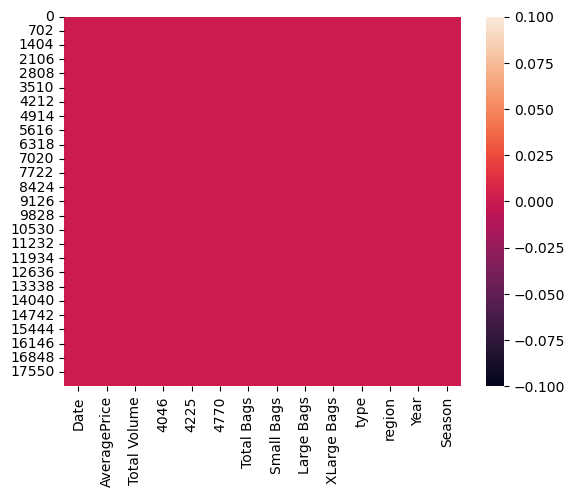

In [25]:
sns.heatmap(df.isna())

No null values found in dataframe

Checking for duplicate data

In [26]:
df.duplicated(keep='first').sum()

0

No duplicate data found in dataframe

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          18249 non-null  datetime64[ns]
 1   AveragePrice  18249 non-null  float64       
 2   Total Volume  18249 non-null  float64       
 3   4046          18249 non-null  float64       
 4   4225          18249 non-null  float64       
 5   4770          18249 non-null  float64       
 6   Total Bags    18249 non-null  float64       
 7   Small Bags    18249 non-null  float64       
 8   Large Bags    18249 non-null  float64       
 9   XLarge Bags   18249 non-null  float64       
 10  type          18249 non-null  object        
 11  region        18249 non-null  object        
 12  Year          18249 non-null  int64         
 13  Season        18249 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(3)
memory usage: 1.9+ MB


# EDA

Differentiating Categorical columns and Numerical columns

In [28]:
catcols=[]
numcols=[]
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        catcols.append(i)
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numcols.append(i)

In [29]:
catcols

['type', 'region', 'Season']

In [30]:
numcols

['Date',
 'AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year']

In [31]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,Winter
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,Winter
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,Winter
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,Winter
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,Summer
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,Summer
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,Summer
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,Summer


In [32]:
df['Small Bags Percentage']=(df['Small Bags'] / df['Total Bags'])*100
df['Large Bags Percentage']=(df['Large Bags'] / df['Total Bags'])*100
df['XLarge Bags Percentage']=(df['XLarge Bags'] / df['Total Bags'])*100

In [33]:
df

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season,Small Bags Percentage,Large Bags Percentage,XLarge Bags Percentage
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,2015,Winter,98.927775,1.072225,0.0
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,2015,Winter,98.974390,1.025610,0.0
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,2015,Winter,98.733756,1.266244,0.0
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,2015,Winter,97.698222,2.301778,0.0
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,2015,Winter,96.803176,3.196824,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,WestTexNewMexico,2018,Summer,96.800796,3.199204,0.0
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,WestTexNewMexico,2018,Summer,96.494273,3.505727,0.0
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,WestTexNewMexico,2018,Summer,99.549611,0.450389,0.0
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,WestTexNewMexico,2018,Summer,99.544192,0.455808,0.0


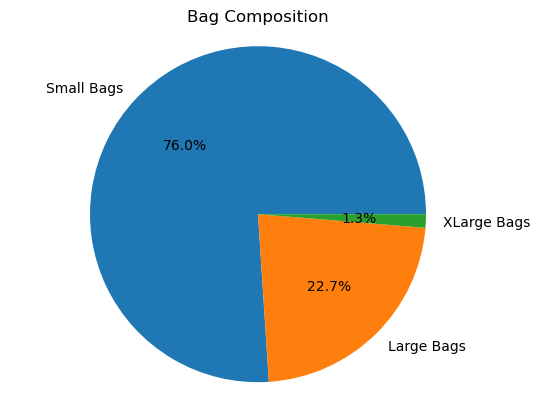

In [34]:
bag_sums = [df['Small Bags'].sum(), df['Large Bags'].sum(), df['XLarge Bags'].sum()]
bag_types = ['Small Bags', 'Large Bags', 'XLarge Bags']
# Create a pie chart
plt.pie(bag_sums, labels=bag_types,autopct='%1.1f%%')
plt.title('Bag Composition')
plt.axis('equal')
plt.show()

The quanity of Small Bags is very high with respect to other bags.

In [35]:
#dropping the Bags percentage columns
df=df.drop(['Small Bags Percentage','Large Bags Percentage','XLarge Bags Percentage'],axis=1)

conventional    9126
organic         9123
Name: type, dtype: int64

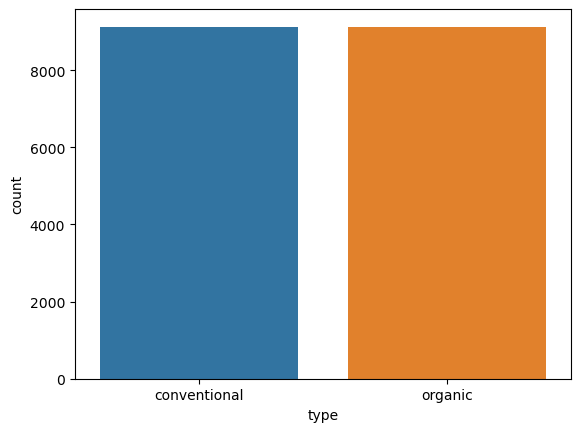

In [36]:
sns.countplot(x='type',data=df)
df['type'].value_counts()

Summer    9718
Winter    8531
Name: Season, dtype: int64

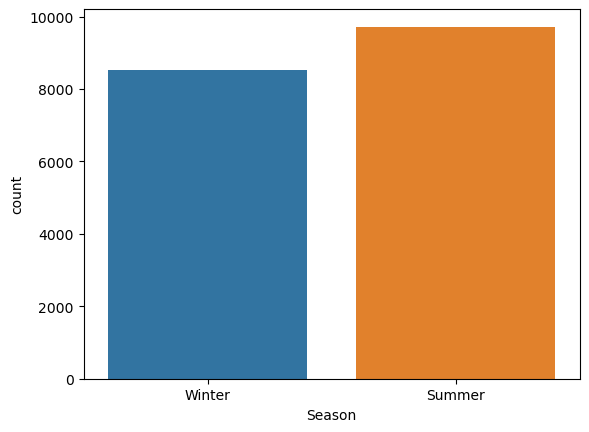

In [37]:
sns.countplot(x='Season',data=df)
df['Season'].value_counts()

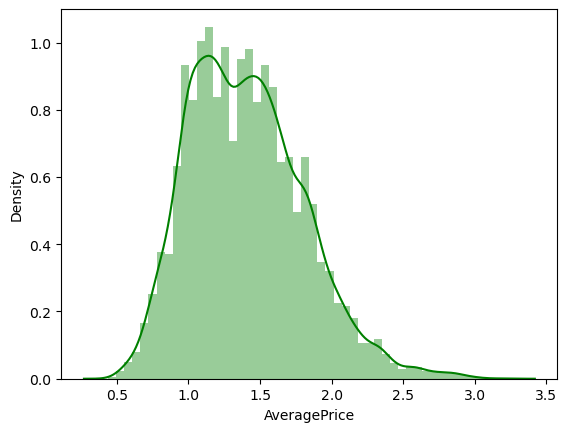

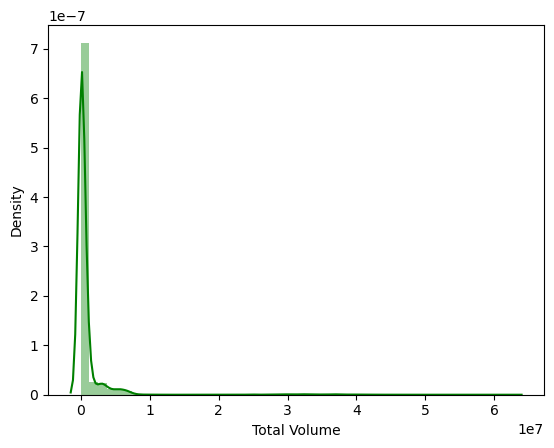

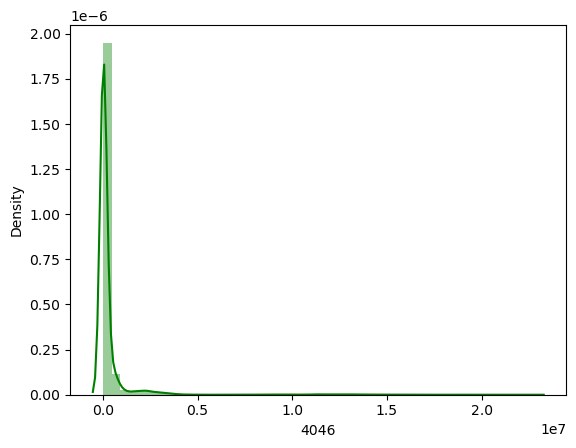

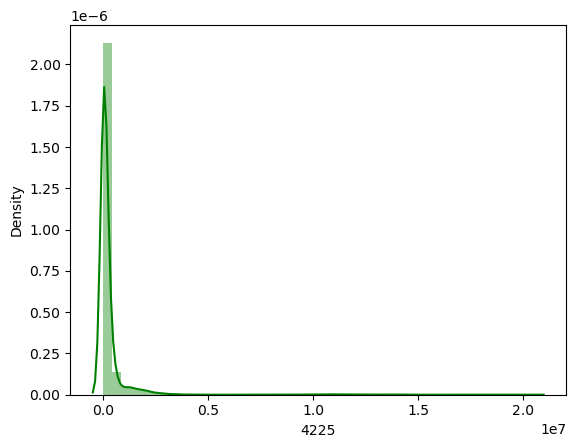

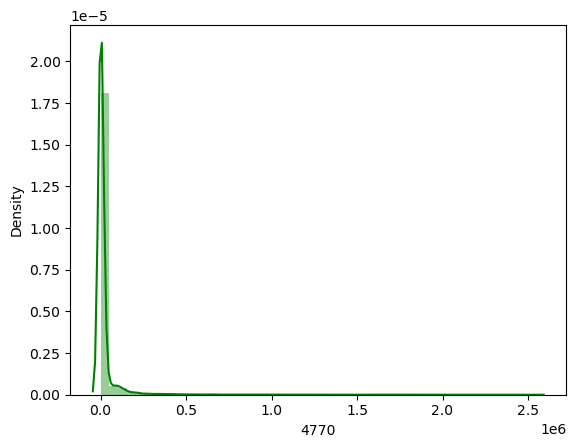

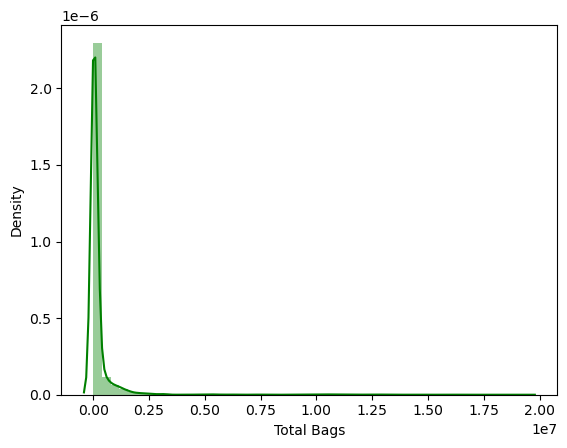

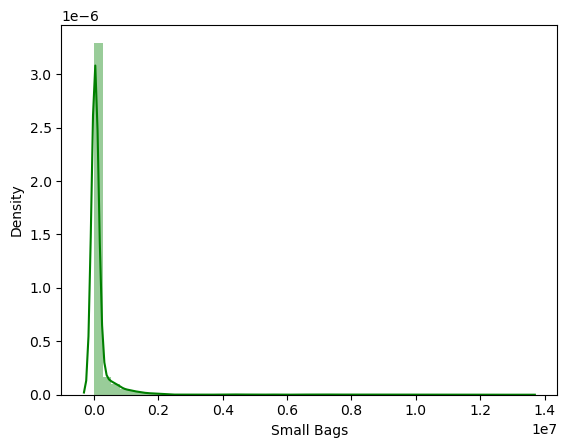

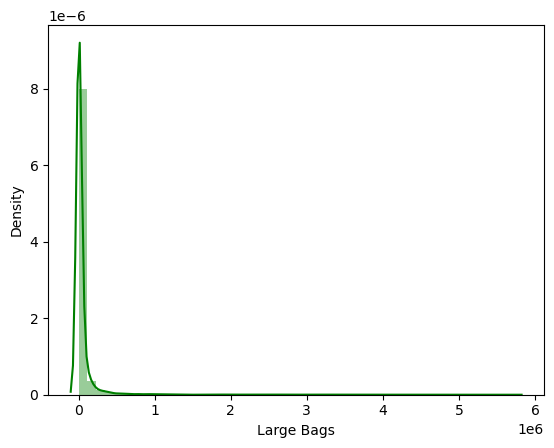

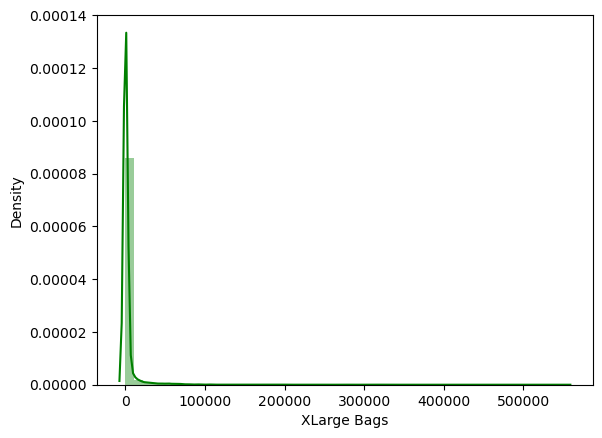

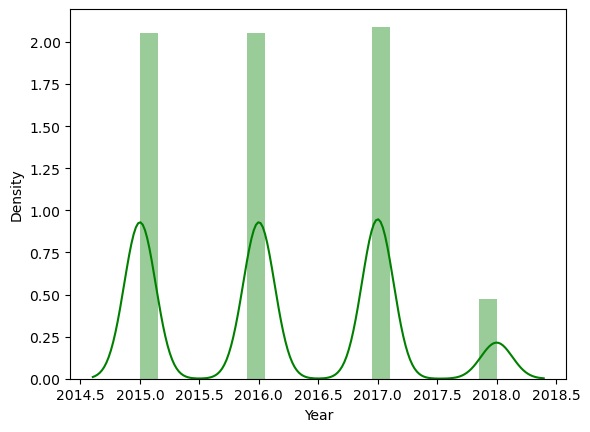

<Figure size 640x480 with 0 Axes>

In [38]:
for i in numcols[1:]:
    sns.distplot(df[i],color='green')
    plt.xlabel(i)
    plt.show()
plt.tight_layout()

<Axes: xlabel='Year', ylabel='AveragePrice'>

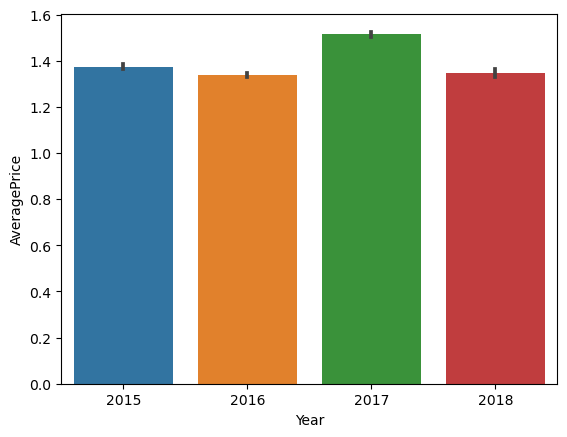

In [39]:
sns.barplot(x='Year',y='AveragePrice',data=df)

Average price was highest in the year 2017 and lowest in the year 2016.

<Axes: xlabel='type', ylabel='AveragePrice'>

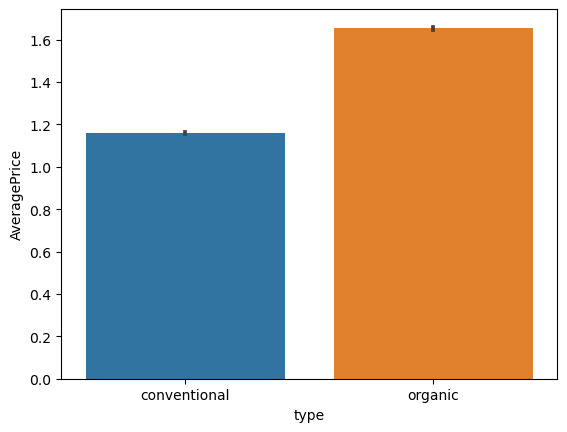

In [40]:
sns.barplot(x='type',y='AveragePrice',data=df)

Average Price of organic avocados is higher than conventional

<Axes: xlabel='type', ylabel='Total Volume'>

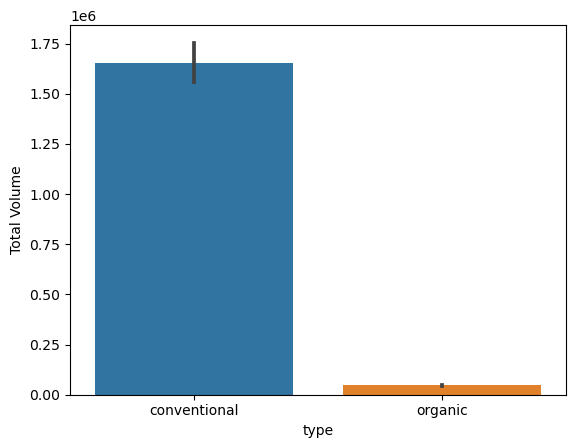

In [41]:
sns.barplot(x='type',y='Total Volume',data=df)

Total volume sold of organic avocados are very low compared to conventional.

<Axes: xlabel='Total Volume', ylabel='region'>

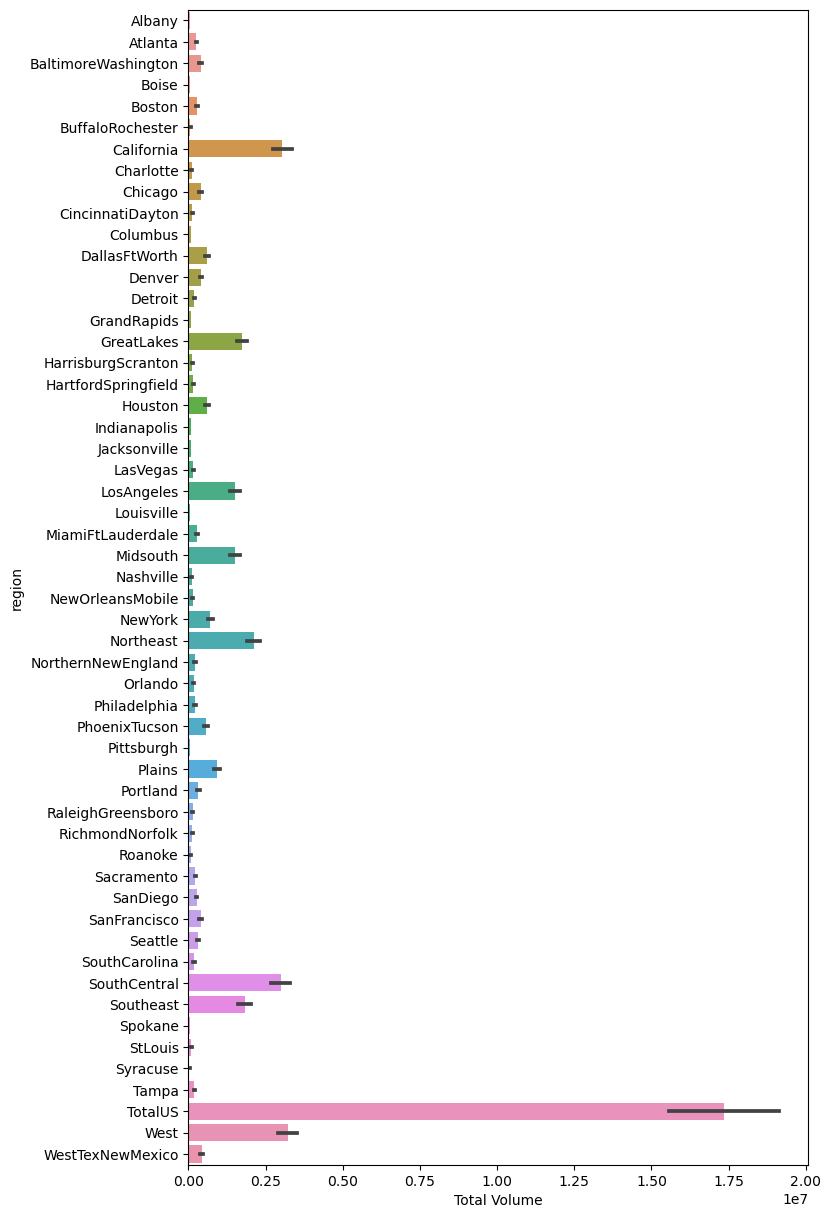

In [42]:
plt.figure(figsize=(8,15))
sns.barplot(x='Total Volume',y='region',data=df)

Highest volume sold are in California,West,SouthCentral and NorthEast regions.

<Axes: xlabel='AveragePrice', ylabel='region'>

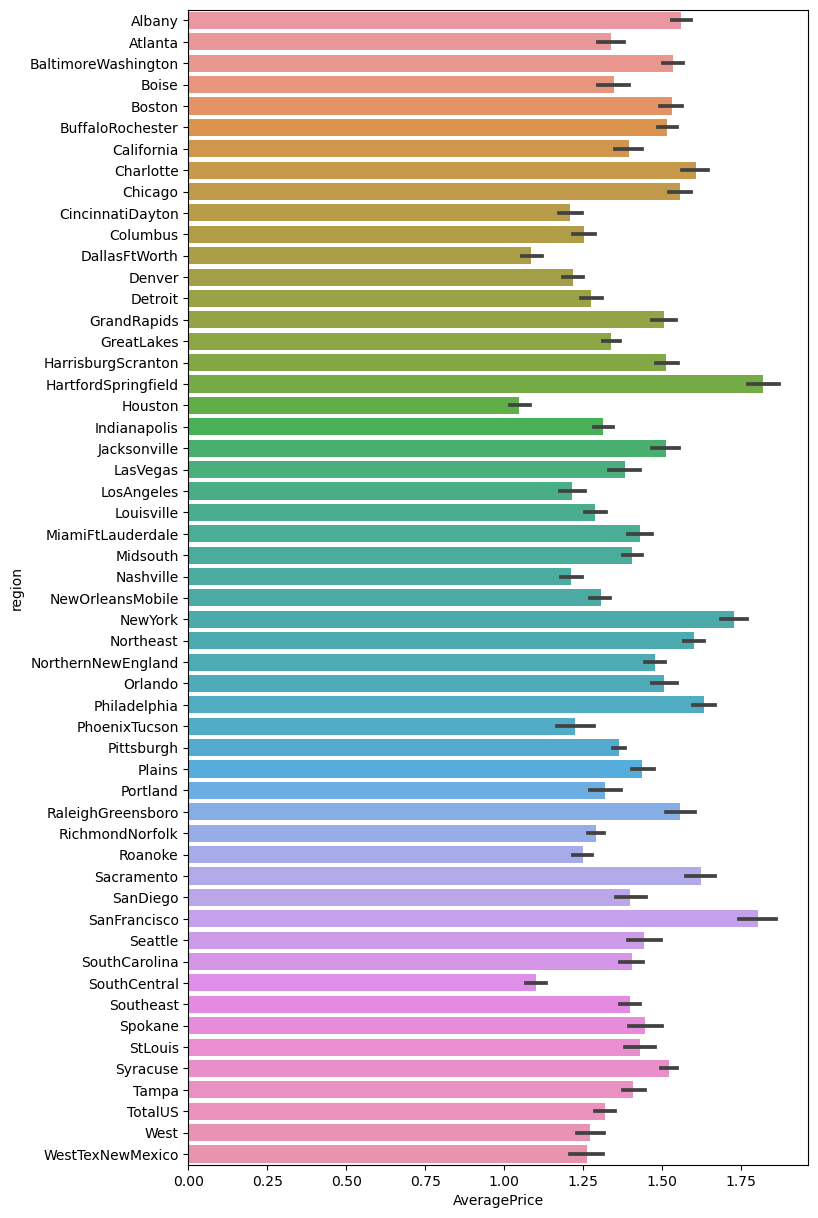

In [43]:
plt.figure(figsize=(8,15))
sns.barplot(x='AveragePrice',y='region',data=df)

1. Highest Average price are in HartfordSpringfield,SanFrancisco and NewYork regions.
2. Lowest Average price are in Houston,DallasFtWorth, and SouthCentral regions. 

<Axes: xlabel='AveragePrice', ylabel='Total Volume'>

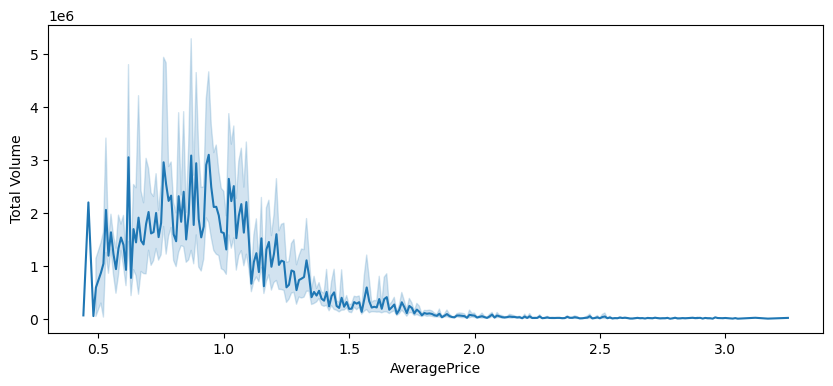

In [44]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='AveragePrice',y='Total Volume')

AveragePrice is low when Total Volume is high.

<Axes: xlabel='Season', ylabel='AveragePrice'>

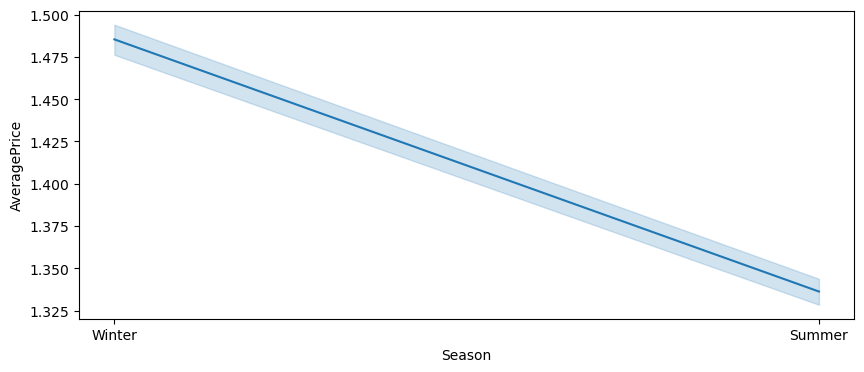

In [45]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='Season',y='AveragePrice')

High Spike increase in Average prices can be seen in winter season.

<Axes: xlabel='Date', ylabel='AveragePrice'>

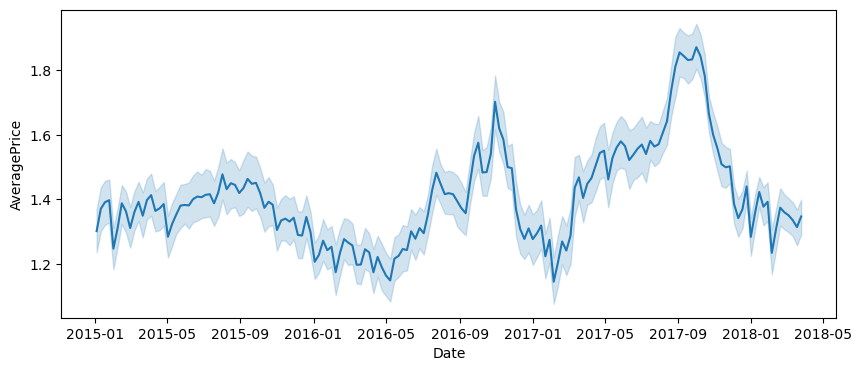

In [46]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='Date',y='AveragePrice')

Highest AveragePrice recorded was during November 2019.

<Axes: xlabel='Date', ylabel='AveragePrice'>

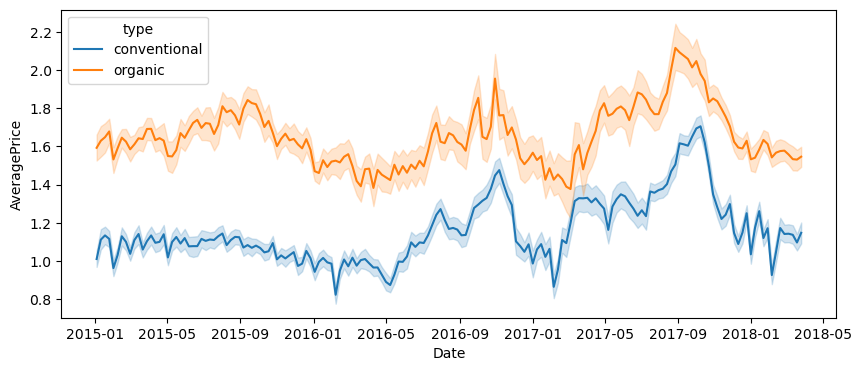

In [47]:
plt.figure(figsize=(10,4))
sns.lineplot(data=df,x='Date',y='AveragePrice',hue='type')

The AveragePrice fluctuation of both conventional and organic avocados are almost identical.

<Axes: xlabel='Year', ylabel='Total Volume'>

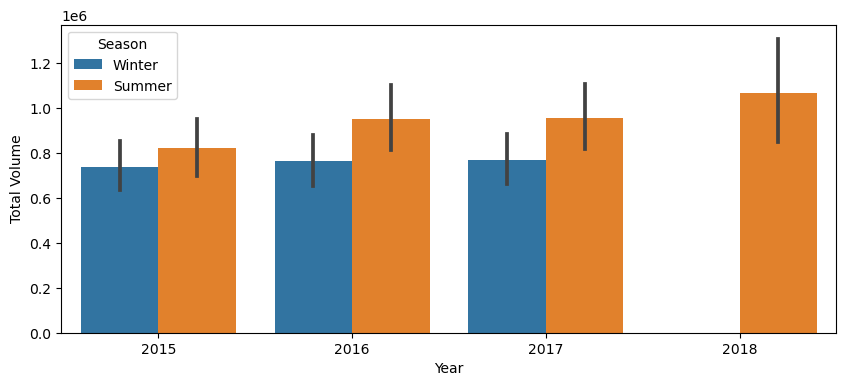

In [48]:
plt.figure(figsize=(10,4))
sns.barplot(data=df,y='Total Volume',x='Year',hue='Season')

Total volumes of avocados sold are high in summer than winter.

<Axes: xlabel='AveragePrice', ylabel='region'>

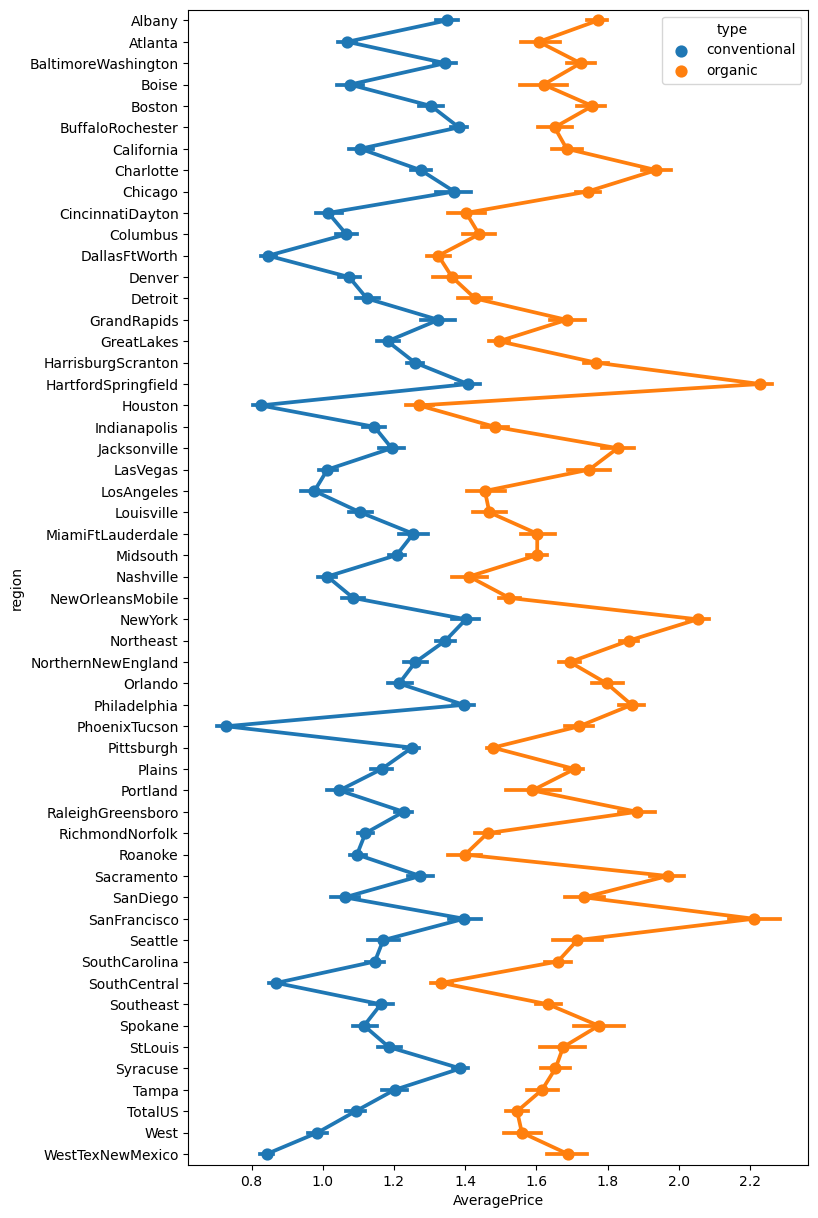

In [49]:
plt.figure(figsize=(8,15))
sns.pointplot(x='AveragePrice', y='region', data=df, hue='type')

Dropping columns 'Date','Small Bags Percentage','Large Bags Percentage','XLarge Bags Percentage'.

In [50]:
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [51]:
df=df.drop(['Date'],axis=1)

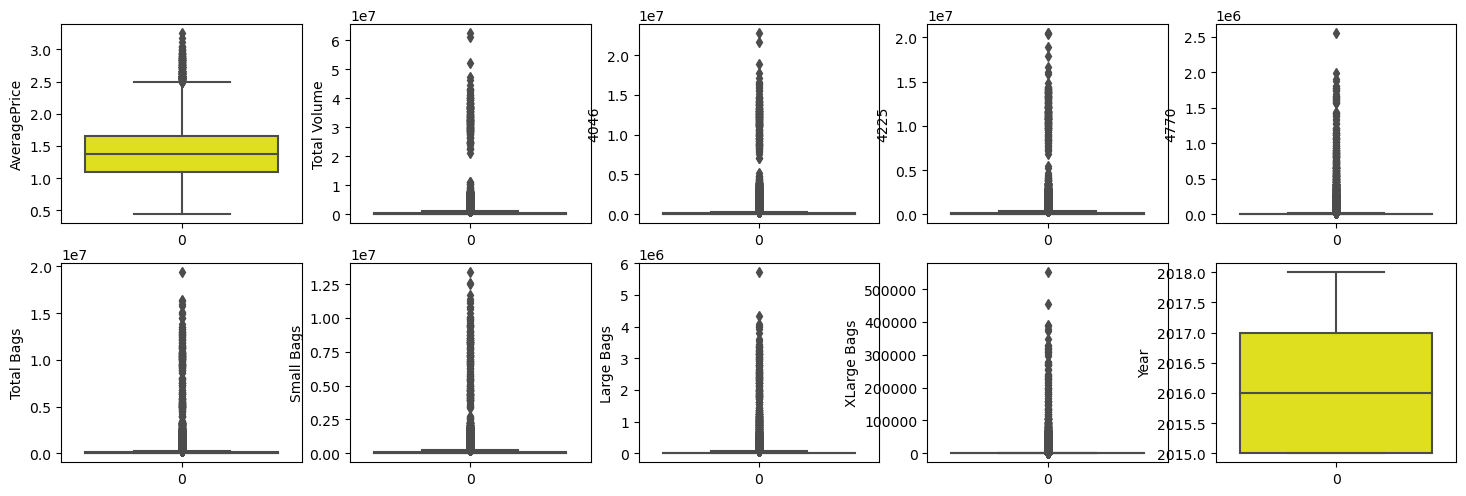

In [52]:
plt.figure(figsize=(18,15))
p=1
for i in numcols[1:]:
    if p<=10:
        plt.subplot(5,5,p)
        sns.boxplot(df[i],color='yellow',orient='v')
        plt.ylabel(i)
        p=p+1
plt.show()

Multiple outliers found in many columns.

In [53]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
dtype: float64

In [54]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [55]:
catcols=[]
numcols=[]
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        catcols.append(i)
for i in df.dtypes.index:
    if df.dtypes[i] != 'object':
        numcols.append(i)
catcols

['type', 'region', 'Season']

In [56]:
numcols

['AveragePrice',
 'Total Volume',
 '4046',
 '4225',
 '4770',
 'Total Bags',
 'Small Bags',
 'Large Bags',
 'XLarge Bags',
 'Year']

In [57]:
df.skew()

AveragePrice     0.580303
Total Volume     9.007687
4046             8.648220
4225             8.942466
4770            10.159396
Total Bags       9.756072
Small Bags       9.540660
Large Bags       9.796455
XLarge Bags     13.139751
Year             0.215339
dtype: float64

In [58]:
#applying cuberoot transformation on data with high skewness
for i in numcols[:-1]:
    df[i]=np.cbrt(df[i])

In [59]:
df.skew()

AveragePrice    0.070540
Total Volume    2.236143
4046            2.277861
4225            2.130378
4770            2.316048
Total Bags      2.302176
Small Bags      2.217682
Large Bags      2.186514
XLarge Bags     2.842255
Year            0.215339
dtype: float64

In [60]:
df

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,1.099724,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0,conventional,Albany,2015,Winter
1,1.105209,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0,conventional,Albany,2015,Winter
2,0.976100,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0,conventional,Albany,2015,Winter
3,1.025986,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0,conventional,Albany,2015,Winter
4,1.085767,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0,conventional,Albany,2015,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18244,1.176872,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0,organic,WestTexNewMexico,2018,Summer
18245,1.195819,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0,organic,WestTexNewMexico,2018,Summer
18246,1.232009,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0,organic,WestTexNewMexico,2018,Summer
18247,1.245047,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0,organic,WestTexNewMexico,2018,Summer


In [61]:
x=df.drop(['AveragePrice'],axis=1)
y=df['AveragePrice']

In [62]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [63]:
x1=x
x1=x1.drop(['type','region','Year','Season'],axis=1)
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,40.049235,10.120997,37.903460,3.638275,20.564634,20.490870,4.534711,0.0
1,38.001150,8.768933,35.473513,3.878204,21.183249,21.110581,4.602425,0.0
2,49.079175,9.262632,47.790416,5.072283,20.120399,20.035113,4.689671,0.0
3,42.906983,10.421946,41.597133,4.171309,17.978534,17.839520,5.114173,0.0
4,37.093893,9.800999,35.260208,4.231732,18.355039,18.157325,5.825433,0.0
...,...,...,...,...,...,...,...,...
18244,25.750488,12.697058,11.520945,0.000000,23.810234,23.553564,7.558651,0.0
18245,24.037003,10.602029,15.083241,0.000000,21.002902,20.754542,6.873934,0.0
18246,23.966829,10.602681,13.486113,8.995636,21.100134,21.068409,3.484558,0.0
18247,25.305697,11.517001,14.392048,8.991803,22.219254,22.185443,3.684031,0.0


In [64]:
x1_n=scaler.fit_transform(x1)
x1=pd.DataFrame(x1_n,columns=x1.columns)
x1

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
0,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449
1,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449
2,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449
3,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449
4,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449
...,...,...,...,...,...,...,...,...
18244,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449
18245,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449
18246,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449
18247,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449


In [65]:
for i in x1.columns:
    x[i]=x1[i]

In [66]:
x

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,-0.373714,-0.659077,-0.034740,-0.516446,-0.598284,-0.499147,-0.726623,-0.497449,conventional,Albany,2015,Winter
1,-0.416209,-0.695853,-0.104144,-0.502067,-0.578275,-0.477634,-0.723402,-0.497449,conventional,Albany,2015,Winter
2,-0.186355,-0.682425,0.247649,-0.430509,-0.612653,-0.514969,-0.719251,-0.497449,conventional,Albany,2015,Winter
3,-0.314419,-0.650891,0.070758,-0.484502,-0.681931,-0.591191,-0.699057,-0.497449,conventional,Albany,2015,Winter
4,-0.435033,-0.667781,-0.110236,-0.480881,-0.669753,-0.580158,-0.665220,-0.497449,conventional,Albany,2015,Winter
...,...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.670393,-0.589007,-0.788271,-0.734478,-0.493306,-0.392824,-0.582767,-0.497449,organic,WestTexNewMexico,2018,Summer
18245,-0.705946,-0.645993,-0.686526,-0.734478,-0.584109,-0.489994,-0.615341,-0.497449,organic,WestTexNewMexico,2018,Summer
18246,-0.707402,-0.645975,-0.732143,-0.195392,-0.580964,-0.479098,-0.776582,-0.497449,organic,WestTexNewMexico,2018,Summer
18247,-0.679622,-0.621105,-0.706268,-0.195622,-0.544766,-0.440319,-0.767092,-0.497449,organic,WestTexNewMexico,2018,Summer


Standardization of Numerical data done

In [67]:
#checking correlation
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,Year
AveragePrice,1.000000,-0.501271,-0.520517,-0.423702,-0.446639,-0.477502,-0.444342,-0.443539,-0.306710,0.092007
Total Volume,-0.501271,1.000000,0.936579,0.959318,0.855680,0.968592,0.960888,0.813446,0.736414,0.049149
4046,-0.520517,0.936579,1.000000,0.826342,0.790790,0.889873,0.880089,0.769275,0.693262,0.012694
4225,-0.423702,0.959318,0.826342,1.000000,0.845655,0.905044,0.904775,0.735340,0.691925,-0.004311
4770,-0.446639,0.855680,0.790790,0.845655,1.000000,0.803904,0.809414,0.639581,0.729334,-0.062421
Total Bags,-0.477502,0.968592,0.889873,0.905044,0.803904,1.000000,0.982716,0.858497,0.743290,0.158680
Small Bags,-0.444342,0.960888,0.880089,0.904775,0.809414,0.982716,1.000000,0.764841,0.742418,0.143385
Large Bags,-0.443539,0.813446,0.769275,0.735340,0.639581,0.858497,0.764841,1.000000,0.592155,0.166212
XLarge Bags,-0.306710,0.736414,0.693262,0.691925,0.729334,0.743290,0.742418,0.592155,1.000000,0.151598
Year,0.092007,0.049149,0.012694,-0.004311,-0.062421,0.158680,0.143385,0.166212,0.151598,1.000000


<Axes: >

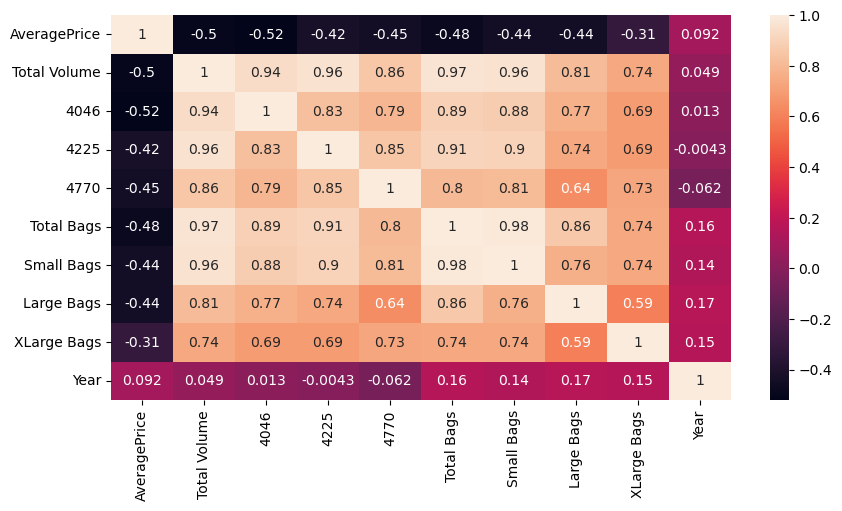

In [68]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)

1. Total Bags is positively correlated with Small Bags, Large Bags and XLarge Bags.
2. Similarly Total Volume is also positively correlated with 4046, 4225 and 4770.

Therefore, removing both 'Total Bags' and 'Total Volume' columns.

In [69]:
x=x.drop(['Total Volume'],axis=1)
x=x.drop(['Total Bags'],axis=1)
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,-0.659077,-0.034740,-0.516446,-0.499147,-0.726623,-0.497449,conventional,Albany,2015,Winter
1,-0.695853,-0.104144,-0.502067,-0.477634,-0.723402,-0.497449,conventional,Albany,2015,Winter
2,-0.682425,0.247649,-0.430509,-0.514969,-0.719251,-0.497449,conventional,Albany,2015,Winter
3,-0.650891,0.070758,-0.484502,-0.591191,-0.699057,-0.497449,conventional,Albany,2015,Winter
4,-0.667781,-0.110236,-0.480881,-0.580158,-0.665220,-0.497449,conventional,Albany,2015,Winter
...,...,...,...,...,...,...,...,...,...,...
18244,-0.589007,-0.788271,-0.734478,-0.392824,-0.582767,-0.497449,organic,WestTexNewMexico,2018,Summer
18245,-0.645993,-0.686526,-0.734478,-0.489994,-0.615341,-0.497449,organic,WestTexNewMexico,2018,Summer
18246,-0.645975,-0.732143,-0.195392,-0.479098,-0.776582,-0.497449,organic,WestTexNewMexico,2018,Summer
18247,-0.621105,-0.706268,-0.195622,-0.440319,-0.767092,-0.497449,organic,WestTexNewMexico,2018,Summer


In [70]:
y

0        1.099724
1        1.105209
2        0.976100
3        1.025986
4        1.085767
           ...   
18244    1.176872
18245    1.195819
18246    1.232009
18247    1.245047
18248    1.174460
Name: AveragePrice, Length: 18249, dtype: float64

Encoding the Categorical columns

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [72]:
#columns to be encoded
s=['type','region','Year','Season']
for i in s:
    x[i]=le.fit_transform(x[i])

In [73]:
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,-0.659077,-0.034740,-0.516446,-0.499147,-0.726623,-0.497449,0,0,0,1
1,-0.695853,-0.104144,-0.502067,-0.477634,-0.723402,-0.497449,0,0,0,1
2,-0.682425,0.247649,-0.430509,-0.514969,-0.719251,-0.497449,0,0,0,1
3,-0.650891,0.070758,-0.484502,-0.591191,-0.699057,-0.497449,0,0,0,1
4,-0.667781,-0.110236,-0.480881,-0.580158,-0.665220,-0.497449,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
18244,-0.589007,-0.788271,-0.734478,-0.392824,-0.582767,-0.497449,1,53,3,0
18245,-0.645993,-0.686526,-0.734478,-0.489994,-0.615341,-0.497449,1,53,3,0
18246,-0.645975,-0.732143,-0.195392,-0.479098,-0.776582,-0.497449,1,53,3,0
18247,-0.621105,-0.706268,-0.195622,-0.440319,-0.767092,-0.497449,1,53,3,0


Checking Variance inflation factor

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [75]:
vif=pd.DataFrame()
vif['Values']=[variance_inflation_factor(x.values,i)
              for i in range(len(x.columns))]
vif['features']=x.columns
vif

,Values,features
0,5.994549,4046
1,7.473671,4225
2,4.410348,4770
3,9.497985,Small Bags
4,2.808167,Large Bags
5,2.635223,XLarge Bags
6,3.002619,type
7,3.040481,region
8,2.346301,Year
9,1.624018,Season


Before we proceed to modeling, we need to make prediction model for:
1. For predicting the average price.
2. For predicting the region.

# Modeling 1

For predicting the average price using regression

In [76]:
#importing libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#importing models
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.svm import SVR

In [77]:
maxAccu=0
maxRs=0
for i in range(1,500):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print(maxAccu, maxRs)

0.548836965085364 113


In [78]:
#defining a function name model for running different models
def model(m):
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('R2 Score: ',r2_score(y_test,pred)*100)
    print('R2 Score on training data: ',r2_score(y_train,m.predict(x_train))*100)
    print('MAE: ',mean_absolute_error(y_test,pred))
    print('MSE: ',mean_squared_error(y_test,pred))
    print('RMSE: ',np.sqrt(mean_squared_error(y_test,pred)))
    sns.regplot(x=pred,y=y_test)

R2 Score:  51.45606120520259
R2 Score on training data:  51.95024787878231
MAE:  0.05673239567664677
MSE:  0.005182967639965135
RMSE:  0.07199283047613238


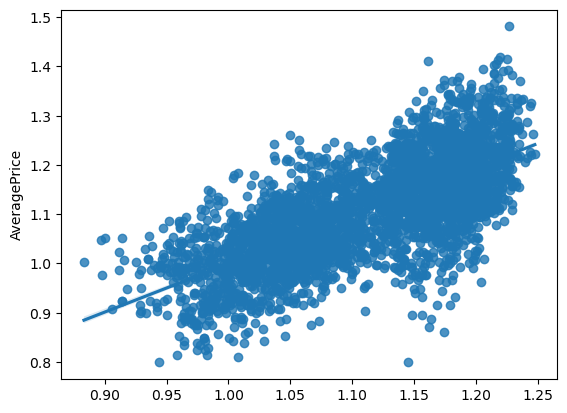

In [79]:
lr=LinearRegression()
model(lr)

R2 Score:  86.90228417068498
R2 Score on training data:  98.26679728061679
MAE:  0.026626443269755024
MSE:  0.001398424581650847
RMSE:  0.03739551552861448


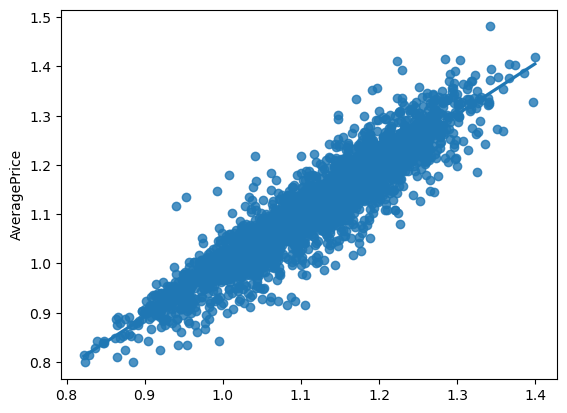

In [80]:
rfr=RandomForestRegressor()
model(rfr)

R2 Score:  57.30097013943363
R2 Score on training data:  59.15629984959775
MAE:  0.054078622239432696
MSE:  0.00455891498546753
RMSE:  0.06751973774732489


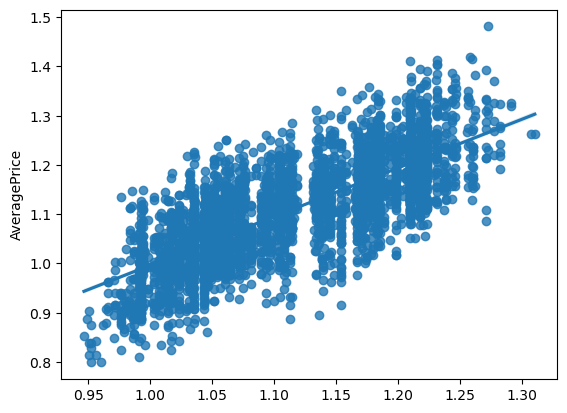

In [81]:
adr=AdaBoostRegressor()
model(adr)

R2 Score:  72.23328456048937
R2 Score on training data:  74.50143281921227
MAE:  0.04182191552072243
MSE:  0.002964612908718639
RMSE:  0.054448259005395565


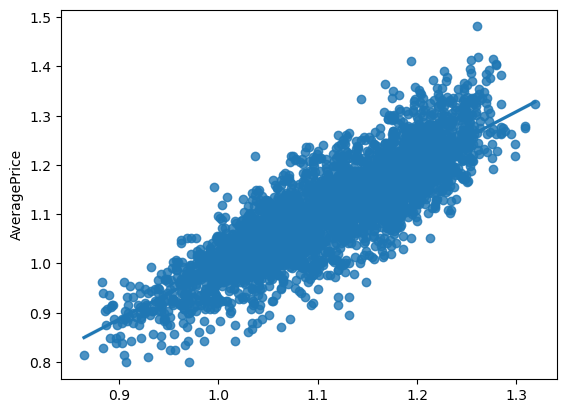

In [82]:
gbr=GradientBoostingRegressor()
model(gbr)

R2 Score:  73.84360178806266
R2 Score on training data:  100.0
MAE:  0.03491672012406622
MSE:  0.0027926816174430884
RMSE:  0.05284582876105822


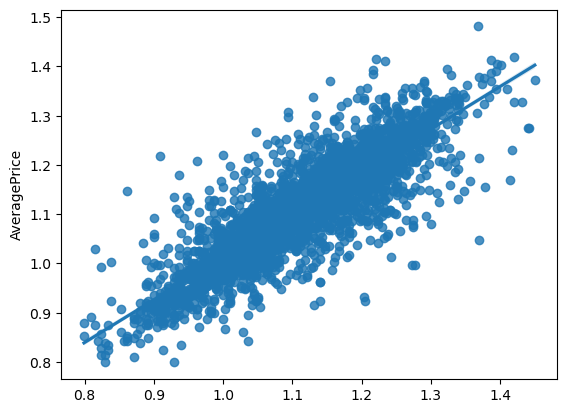

In [83]:
dtr=DecisionTreeRegressor()
model(dtr)

R2 Score:  86.65530915013771
R2 Score on training data:  92.27824529748422
MAE:  0.026791602254108857
MSE:  0.0014247937550462587
RMSE:  0.03774644029635455


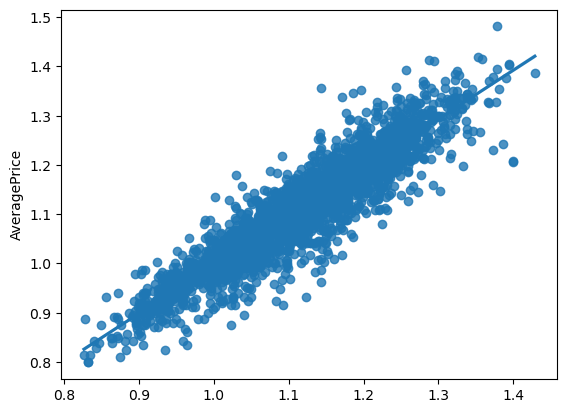

In [84]:
model(KNN())

R2 Score:  -0.024791934114176684
R2 Score on training data:  0.0
MAE:  0.08399380356562208
MSE:  0.010679505467824145
RMSE:  0.10334169278574909


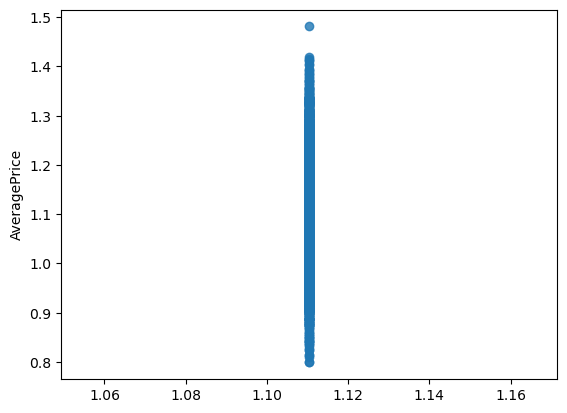

In [85]:
model(Lasso())

R2 Score:  51.45682885354279
R2 Score on training data:  51.95024176180196
MAE:  0.05673183722765525
MSE:  0.00518288567923832
RMSE:  0.0719922612454861


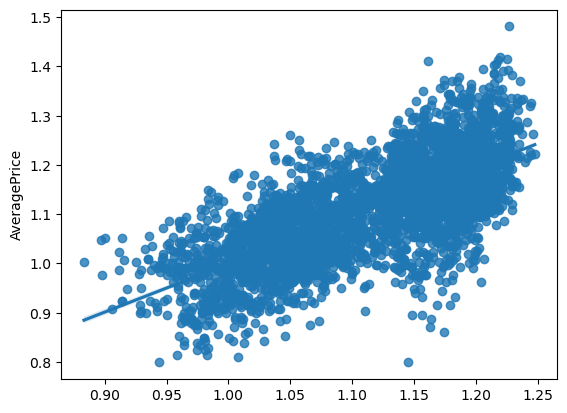

In [86]:
model(Ridge())

R2 Score:  54.27557053565035
R2 Score on training data:  54.58329835608369
MAE:  0.055163205162352916
MSE:  0.004881932619258149
RMSE:  0.06987082809912983


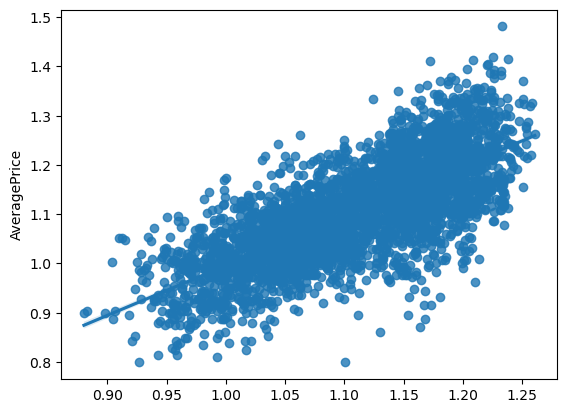

In [87]:
model(SVR())

Cross Validation

In [88]:
from sklearn.model_selection import cross_val_score

In [89]:
def scr(m):
    score=cross_val_score(m,x,y)
    print(score)
    print(score.mean())
    print('Diff b/w R2 score & CV score: ',(r2_score(y_test,pred) - score.mean())*100)

In [90]:
scr(lr)

[-0.22146321  0.28274377  0.39829727  0.10130249  0.14799383]
0.14177483015475942
Diff b/w R2 score & CV score:  37.278578189726645


In [91]:
scr(rfr)

[-0.15219404  0.45510047  0.60977592  0.2769563   0.01999254]
0.2419262406919259
Diff b/w R2 score & CV score:  27.263437136009994


In [92]:
scr(dtr)

[-0.72229953  0.15347502  0.174869   -0.38002958 -0.31430791]
-0.21765860093918593
Diff b/w R2 score & CV score:  73.22192129912118


In [93]:
scr(gbr)

[0.19027067 0.52194327 0.63755978 0.33499057 0.19615209]
0.3761832757409269
Diff b/w R2 score & CV score:  13.837733631109895


In [94]:
scr(adr)

[-0.18488396  0.28540194  0.55427187  0.16262526  0.00843514]
0.1651700482254133
Diff b/w R2 score & CV score:  34.939056382661256


In [95]:
scr(KNN())

[-0.76962293  0.3908116   0.52627761 -0.32190988  0.06414021]
-0.022060677754453594
Diff b/w R2 score & CV score:  53.66212898064795


In [96]:
scr(Lasso())

[-2.86030765 -0.60198656 -0.0234782  -0.59058047 -0.94294236]
-1.0038590470071884
Diff b/w R2 score & CV score:  151.84196590592143


In [97]:
scr(Ridge())

[-0.22129631  0.28284118  0.39822864  0.10137269  0.14806127]
0.14184149624314307
Diff b/w R2 score & CV score:  37.27191158088828


In [98]:
scr(SVR())

[-0.59379541  0.18794002  0.34365004  0.13234196  0.14048647]
0.0421246173751821
Diff b/w R2 score & CV score:  47.243599467684376


The two best performing models are Random Forest Regressor and KNN Regressor.

Hyperparameter tuning

In [99]:
#importing RandomizedseachCV for hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV

For Random Forest Regressor

In [100]:
parameters = {
    'ccp_alpha': [0.0, 0.01, 0.001],
    'warm_start': [True, False],
    'random_state': [10, 20],
    'oob_score': [True, False],
    'bootstrap': [True, False],
    'criterion': ['squared_error', 'absolute_error'],
    'n_jobs': [1],
    'n_estimators': [10, 20]
}

In [101]:
rsv = RandomizedSearchCV(RandomForestRegressor(), parameters, n_iter=10, n_jobs=-1)
rsv.fit(x_train[:5000], y_train[:5000])
print(rsv.best_params_)

{'warm_start': True, 'random_state': 10, 'oob_score': False, 'n_jobs': 1, 'n_estimators': 20, 'criterion': 'squared_error', 'ccp_alpha': 0.0, 'bootstrap': True}


In [102]:
Hyper_rfr=RandomForestRegressor(warm_start=True,random_state=20,oob_score=False,n_jobs=1,n_estimators=10,criterion='absolute_error',ccp_alpha=0.0,bootstrap=True)

R2 Score:  84.81765530488411
R2 Score on training data:  97.21925572485432
MAE:  0.028759201172831247
MSE:  0.001620997455237715
RMSE:  0.04026161267557119


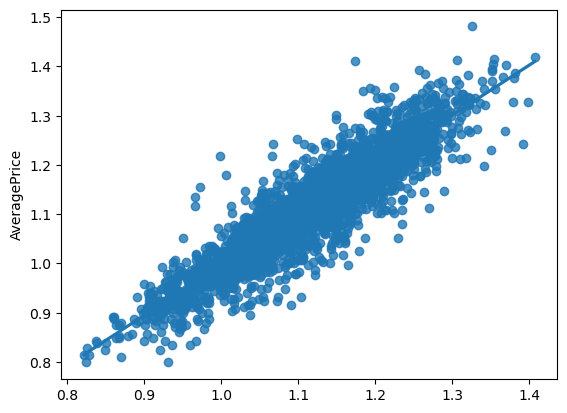

In [103]:
model(Hyper_rfr)

R2 Score after hyperparameter tuning of Random Forest Regressor is 84.81%.

For KNN Regressor

In [104]:
parameters = {
    'n_neighbors': [3,5,6],
    'weights':['uniform','distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute'],
    'leaf_size':[30,50,10],
    'p':[1,2],
    'n_jobs':[1,-1]
}

In [105]:
rsv = RandomizedSearchCV(KNN(), parameters, n_iter=10, n_jobs=-1)
rsv.fit(x_train[:5000], y_train[:5000])
print(rsv.best_params_)

{'weights': 'distance', 'p': 2, 'n_neighbors': 5, 'n_jobs': -1, 'leaf_size': 50, 'algorithm': 'ball_tree'}


In [106]:
Hyper_knn=KNN(weights='uniform',p=1,n_neighbors=6,n_jobs=-1,leaf_size=30,algorithm='ball_tree')

R2 Score:  86.40958591422564
R2 Score on training data:  91.49142175911483
MAE:  0.027008080751204814
MSE:  0.001451029277167842
RMSE:  0.03809237820309782


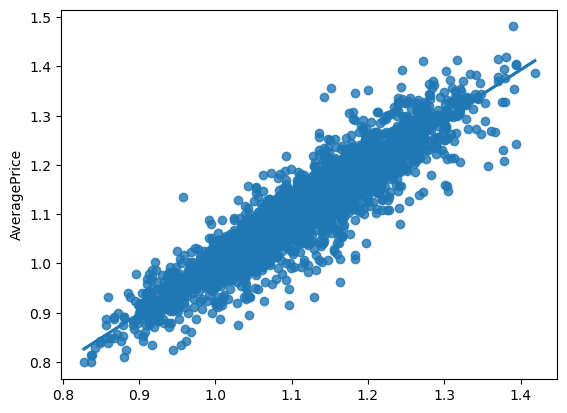

In [107]:
model(Hyper_knn)

R2 Score after hyperparameter tuning of KNN Regressor is 86.40%.

# KNN Regressor is our best model!

In [108]:
Final_model=Hyper_knn

In [109]:
#Saving our model
import joblib
joblib.dump(Final_model,'Avocado_averageprice_pred.pkl')

['Avocado_averageprice_pred.pkl']

In [110]:
model=joblib.load('Avocado_averageprice_pred.pkl')
Prediction=model.predict(x_test)
Prediction

array([1.23697011, 0.8982515 , 1.06261554, ..., 1.03391294, 1.13945529,
       1.17100188])

In [111]:
Comparison=pd.DataFrame()
Comparison['True Value']=y_test
Comparison['Prediciton']=Prediction
Comparison

,True Value,Prediciton
12783,1.159778,1.236970
2785,0.879366,0.898252
400,1.056722,1.062616
2403,0.989898,1.009723
2517,1.080082,1.044051
...,...,...
8336,1.162251,1.091967
15223,1.191138,1.214676
1891,1.053728,1.033913
15100,1.162251,1.139455


# Modeling 2

For predicting the region using classifiers

In [112]:
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season
0,-0.659077,-0.034740,-0.516446,-0.499147,-0.726623,-0.497449,0,0,0,1
1,-0.695853,-0.104144,-0.502067,-0.477634,-0.723402,-0.497449,0,0,0,1
2,-0.682425,0.247649,-0.430509,-0.514969,-0.719251,-0.497449,0,0,0,1
3,-0.650891,0.070758,-0.484502,-0.591191,-0.699057,-0.497449,0,0,0,1
4,-0.667781,-0.110236,-0.480881,-0.580158,-0.665220,-0.497449,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...
18244,-0.589007,-0.788271,-0.734478,-0.392824,-0.582767,-0.497449,1,53,3,0
18245,-0.645993,-0.686526,-0.734478,-0.489994,-0.615341,-0.497449,1,53,3,0
18246,-0.645975,-0.732143,-0.195392,-0.479098,-0.776582,-0.497449,1,53,3,0
18247,-0.621105,-0.706268,-0.195622,-0.440319,-0.767092,-0.497449,1,53,3,0


In [113]:
y

0        1.099724
1        1.105209
2        0.976100
3        1.025986
4        1.085767
           ...   
18244    1.176872
18245    1.195819
18246    1.232009
18247    1.245047
18248    1.174460
Name: AveragePrice, Length: 18249, dtype: float64

Merging both x and y into 1 data frame

In [114]:
df=pd.concat([x,y],axis=1)

In [115]:
df

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,region,Year,Season,AveragePrice
0,-0.659077,-0.034740,-0.516446,-0.499147,-0.726623,-0.497449,0,0,0,1,1.099724
1,-0.695853,-0.104144,-0.502067,-0.477634,-0.723402,-0.497449,0,0,0,1,1.105209
2,-0.682425,0.247649,-0.430509,-0.514969,-0.719251,-0.497449,0,0,0,1,0.976100
3,-0.650891,0.070758,-0.484502,-0.591191,-0.699057,-0.497449,0,0,0,1,1.025986
4,-0.667781,-0.110236,-0.480881,-0.580158,-0.665220,-0.497449,0,0,0,1,1.085767
...,...,...,...,...,...,...,...,...,...,...,...
18244,-0.589007,-0.788271,-0.734478,-0.392824,-0.582767,-0.497449,1,53,3,0,1.176872
18245,-0.645993,-0.686526,-0.734478,-0.489994,-0.615341,-0.497449,1,53,3,0,1.195819
18246,-0.645975,-0.732143,-0.195392,-0.479098,-0.776582,-0.497449,1,53,3,0,1.232009
18247,-0.621105,-0.706268,-0.195622,-0.440319,-0.767092,-0.497449,1,53,3,0,1.245047


For classification problem, our target variable is region.

In [116]:
x=df.drop(['region'],axis=1)
y=df['region']

In [117]:
x

,4046,4225,4770,Small Bags,Large Bags,XLarge Bags,type,Year,Season,AveragePrice
0,-0.659077,-0.034740,-0.516446,-0.499147,-0.726623,-0.497449,0,0,1,1.099724
1,-0.695853,-0.104144,-0.502067,-0.477634,-0.723402,-0.497449,0,0,1,1.105209
2,-0.682425,0.247649,-0.430509,-0.514969,-0.719251,-0.497449,0,0,1,0.976100
3,-0.650891,0.070758,-0.484502,-0.591191,-0.699057,-0.497449,0,0,1,1.025986
4,-0.667781,-0.110236,-0.480881,-0.580158,-0.665220,-0.497449,0,0,1,1.085767
...,...,...,...,...,...,...,...,...,...,...
18244,-0.589007,-0.788271,-0.734478,-0.392824,-0.582767,-0.497449,1,3,0,1.176872
18245,-0.645993,-0.686526,-0.734478,-0.489994,-0.615341,-0.497449,1,3,0,1.195819
18246,-0.645975,-0.732143,-0.195392,-0.479098,-0.776582,-0.497449,1,3,0,1.232009
18247,-0.621105,-0.706268,-0.195622,-0.440319,-0.767092,-0.497449,1,3,0,1.245047


In [118]:
y

0         0
1         0
2         0
3         0
4         0
         ..
18244    53
18245    53
18246    53
18247    53
18248    53
Name: region, Length: 18249, dtype: int32

In [119]:
#there are 53 regions in our data. lets check the values
y.unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53])

In [120]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [121]:
maxAccu=0
maxRS=0

for i in range(1,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    rfr=RandomForestClassifier()
    rfr.fit(x_train, y_train)
    pred=rfr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRs = i
print('Best acc is ', maxAccu, 'at random state', maxRs)

Best acc is  0.9225570776255708 at random state 66


In [122]:
#importing more models
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [123]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)

In [124]:
def model(m):
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print('Accuracy Score: ',accuracy_score(y_test,pred)*100)
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))

In [125]:
rfc=RandomForestClassifier()
model(rfc)

Accuracy Score:  91.41552511415524
[[ 88   0   0 ...   0   0   0]
 [  0  80   0 ...   0   0   1]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  96   0]
 [  0   0   1 ...   0   0  92]]
              precision    recall  f1-score   support

           0       0.82      0.99      0.90        89
           1       0.79      0.88      0.83        91
           2       0.95      0.94      0.95       104
           3       0.91      0.87      0.89       115
           4       0.96      0.92      0.94        97
           5       0.90      0.82      0.86       103
           6       0.99      1.00      0.99        94
           7       0.90      0.96      0.93        89
           8       0.98      0.95      0.97       104
           9       0.89      0.90      0.89        99
          10       0.81      0.87      0.84        98
          11       0.95      0.99      0.97       105
          12       0.93      0.97      0.95        98
          13    

In [126]:
lr=LogisticRegression()
model(lr)

Accuracy Score:  46.61187214611872
[[ 40   0   0 ...   0   0   0]
 [  0  33   0 ...   0   0   0]
 [  0   0  69 ...   0   0   3]
 ...
 [  0   0   0 ... 103   0   0]
 [  0   0   0 ...   3  80   0]
 [  0  12   3 ...   0   0  16]]
              precision    recall  f1-score   support

           0       0.35      0.45      0.39        89
           1       0.20      0.36      0.25        91
           2       0.55      0.66      0.60       104
           3       0.46      0.46      0.46       115
           4       0.36      0.31      0.33        97
           5       0.31      0.46      0.37       103
           6       0.62      0.85      0.71        94
           7       0.35      0.70      0.46        89
           8       0.63      0.80      0.71       104
           9       0.39      0.75      0.51        99
          10       0.62      0.31      0.41        98
          11       0.45      0.50      0.48       105
          12       0.43      0.50      0.46        98
          13    

In [127]:
svc=SVC()
model(svc)

Accuracy Score:  65.22374429223744
[[ 65   0   0 ...   0   0   0]
 [  0  52   0 ...   0   0   0]
 [  0   0  89 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  94   0]
 [  0   5   3 ...   0   0  42]]
              precision    recall  f1-score   support

           0       0.32      0.73      0.45        89
           1       0.33      0.57      0.42        91
           2       0.69      0.86      0.76       104
           3       0.49      0.57      0.52       115
           4       0.86      0.65      0.74        97
           5       0.53      0.45      0.49       103
           6       0.93      0.99      0.96        94
           7       0.58      0.96      0.72        89
           8       0.85      0.97      0.91       104
           9       0.59      0.63      0.61        99
          10       0.56      0.43      0.49        98
          11       0.74      0.68      0.71       105
          12       0.83      0.84      0.83        98
          13    

In [128]:
gb=GradientBoostingClassifier()
model(gb)

Accuracy Score:  83.68949771689498
[[ 82   0   0 ...   0   0   0]
 [  0  64   0 ...   0   0   0]
 [  0   0  94 ...   0   0   0]
 ...
 [  0   0   0 ... 102   2   0]
 [  0   0   0 ...   1  89   0]
 [  0   0   1 ...   0   0  81]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        89
           1       0.66      0.70      0.68        91
           2       0.87      0.90      0.89       104
           3       0.83      0.70      0.76       115
           4       0.87      0.82      0.85        97
           5       0.84      0.77      0.80       103
           6       0.97      0.97      0.97        94
           7       0.84      0.93      0.88        89
           8       0.94      0.94      0.94       104
           9       0.81      0.84      0.82        99
          10       0.68      0.69      0.69        98
          11       0.86      0.90      0.88       105
          12       0.90      0.94      0.92        98
          13    

In [129]:
abc=AdaBoostClassifier()
model(abc)

Accuracy Score:  5.5159817351598175
[[ 0  0  0 ...  0  0  0]
 [ 0  0  0 ...  9  0  3]
 [ 0  0  0 ...  0  0  0]
 ...
 [ 0  0  0 ... 83  2  0]
 [ 0  0  0 ... 45  0  0]
 [ 0  0  0 ... 19  0 26]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        89
           1       0.00      0.00      0.00        91
           2       0.00      0.00      0.00       104
           3       0.00      0.00      0.00       115
           4       0.00      0.00      0.00        97
           5       0.00      0.00      0.00       103
           6       0.00      0.00      0.00        94
           7       0.00      0.00      0.00        89
           8       0.00      0.00      0.00       104
           9       0.00      0.00      0.00        99
          10       0.00      0.00      0.00        98
          11       0.00      0.00      0.00       105
          12       0.00      0.00      0.00        98
          13       0.00      0.00      0.00        

In [130]:
bc=BaggingClassifier()
model(bc)

Accuracy Score:  86.00913242009133
[[ 82   0   0 ...   0   0   0]
 [  0  73   0 ...   0   0   0]
 [  0   0  95 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  92   0]
 [  0   1   2 ...   0   0  81]]
              precision    recall  f1-score   support

           0       0.75      0.92      0.83        89
           1       0.77      0.80      0.78        91
           2       0.90      0.91      0.91       104
           3       0.81      0.83      0.82       115
           4       0.88      0.89      0.88        97
           5       0.83      0.82      0.82       103
           6       0.96      1.00      0.98        94
           7       0.82      0.94      0.88        89
           8       0.93      0.95      0.94       104
           9       0.83      0.87      0.85        99
          10       0.71      0.77      0.74        98
          11       0.90      0.97      0.94       105
          12       0.93      0.92      0.92        98
          13    

In [131]:
etc=ExtraTreesClassifier()
model(etc)

Accuracy Score:  92.96803652968036
[[ 88   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   1]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  95   0]
 [  0   0   1 ...   0   0  91]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96        89
           1       0.84      0.89      0.87        91
           2       0.95      1.00      0.98       104
           3       0.93      0.87      0.90       115
           4       0.97      0.98      0.97        97
           5       0.92      0.92      0.92       103
           6       0.99      1.00      0.99        94
           7       0.95      0.97      0.96        89
           8       0.99      0.99      0.99       104
           9       0.88      0.90      0.89        99
          10       0.86      0.87      0.86        98
          11       0.97      0.96      0.97       105
          12       0.96      1.00      0.98        98
          13    

In [132]:
from sklearn.model_selection import cross_val_score

In [133]:
def scr(m):
    score=cross_val_score(m,x,y)
    print(score.mean())
    print('Diff b/w Accuracy score & CV score: ',(accuracy_score(y_test,pred) - score.mean())*100)

In [134]:
scr(rfc)

0.6955341339530065
Diff b/w Accuracy score & CV score:  22.13608432159433


In [135]:
scr(lr)

0.35425629089598576
Diff b/w Accuracy score & CV score:  56.2638686272964


In [136]:
scr(svc)

0.4892189941323763
Diff b/w Accuracy score & CV score:  42.767598303657344


In [137]:
scr(gb)

0.6191457971221239
Diff b/w Accuracy score & CV score:  29.774918004682583


In [138]:
scr(abc)

0.05556442185323808
Diff b/w Accuracy score & CV score:  86.13305553157117


In [139]:
scr(bc)

0.6314772972140988
Diff b/w Accuracy score & CV score:  28.54176799548509


In [140]:
scr(etc)

0.7089057388588355
Diff b/w Accuracy score & CV score:  20.79892383101143


The two best performing models are Random Forest Classifier and Extra Trees Classifier.

Hyperparameter tuning

In [141]:
#importing RandomizedseachCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

For Random Forest Classifier

In [143]:
parametersg = {
    'n_estimators': [50, 100],
    'max_depth': [2, 3, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'random_state': [10, None],
    'n_jobs': [1, -1],
}

In [153]:
gsv = GridSearchCV(RandomForestClassifier(), parametersg)
gsv.fit(x_train, y_train)
print(rsv.best_params_)

{'random_state': None, 'n_jobs': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [155]:
Hyper_rfc=RandomForestClassifier(random_state=None,n_jobs=1,n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None)

In [157]:
model(Hyper_rfc)

Accuracy Score:  91.45205479452055
[[ 83   0   0 ...   0   0   0]
 [  0  78   0 ...   0   0   1]
 [  0   0  98 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  95   0]
 [  0   0   1 ...   0   0  88]]
              precision    recall  f1-score   support

           0       0.83      0.93      0.88        89
           1       0.76      0.86      0.81        91
           2       0.96      0.94      0.95       104
           3       0.89      0.85      0.87       115
           4       0.95      0.95      0.95        97
           5       0.88      0.82      0.85       103
           6       0.98      1.00      0.99        94
           7       0.91      0.94      0.93        89
           8       0.98      0.96      0.97       104
           9       0.88      0.88      0.88        99
          10       0.81      0.85      0.83        98
          11       0.95      0.99      0.97       105
          12       0.93      0.98      0.96        98
          13    

Random Forest Classifier accuracy after Hyper parameter tuning is 91.45%

For Extra Trees Classifier

In [148]:
parametersge = {
    'n_estimators': [50, 100],
    'max_depth': [None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1],
    'max_features': ['sqrt', 'log2'],
    'random_state': [None],
    'n_jobs': [1, -1],
}

In [149]:
rsv = RandomizedSearchCV(ExtraTreesClassifier(), parametersge)
rsv.fit(x_train, y_train)
print(rsv.best_params_)

{'random_state': None, 'n_jobs': 1, 'n_estimators': 100, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [158]:
Hyper_etc=ExtraTreesClassifier(random_state=None,n_jobs=1,n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None)

In [159]:
model(Hyper_etc)

Accuracy Score:  92.91324200913242
[[ 87   0   0 ...   0   0   0]
 [  0  83   0 ...   0   0   0]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  96   0]
 [  0   0   1 ...   0   0  94]]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94        89
           1       0.85      0.91      0.88        91
           2       0.95      1.00      0.97       104
           3       0.95      0.87      0.91       115
           4       0.98      0.95      0.96        97
           5       0.90      0.89      0.90       103
           6       1.00      1.00      1.00        94
           7       0.93      0.94      0.94        89
           8       0.99      0.98      0.99       104
           9       0.88      0.91      0.90        99
          10       0.88      0.85      0.86        98
          11       0.95      0.96      0.96       105
          12       0.95      1.00      0.98        98
          13    

Extra Trees Classifier accuracy after Hyper parameter tuning is 92.91%

In [160]:
Final_model=ExtraTreesClassifier(random_state=None,n_jobs=1,n_estimators=100,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=None)

In [161]:
model(Final_model)

Accuracy Score:  92.74885844748859
[[ 86   0   0 ...   0   0   0]
 [  0  81   0 ...   0   0   1]
 [  0   0 104 ...   0   0   0]
 ...
 [  0   0   0 ... 104   0   0]
 [  0   0   0 ...   2  96   0]
 [  0   0   1 ...   0   0  95]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92        89
           1       0.85      0.89      0.87        91
           2       0.95      1.00      0.97       104
           3       0.93      0.87      0.90       115
           4       0.98      0.98      0.98        97
           5       0.92      0.91      0.92       103
           6       1.00      1.00      1.00        94
           7       0.95      0.98      0.96        89
           8       0.99      0.98      0.99       104
           9       0.86      0.89      0.88        99
          10       0.87      0.87      0.87        98
          11       0.99      0.97      0.98       105
          12       0.97      1.00      0.98        98
          13    

Final model accuracy is 92.74%,

In [169]:
#Saving our model
import joblib
joblib.dump(Final_model,'Avocado region prediction.pkl')

['Avocado region prediction.pkl']

In [170]:
#Predicting the Test data
model = joblib.load('Glass Classification.pkl')

prediction=Final_model.predict(x_test)
prediction

array([20, 24, 33, ..., 37, 26, 31])

In [174]:
Comparison=pd.DataFrame()
Comparison['True Value']=y_test
Comparison['Prediciton']=prediction
Comparison

,True Value,Prediciton
1078,20,20
13352,27,24
13651,33,33
16420,31,31
9962,16,16
...,...,...
6152,10,10
14980,4,4
16734,37,37
6998,26,26


# Model for predicting the average price - Avocado_averageprice_pred.pkl
# Model for predicting the region - Avocado region prediction.pkl